# Trabalho (Sistemas de Comunicação) - BANDA BASE E CÓDIGO DE LINHA

Alunos:
* Alejo Perdomo Milar
* João Mário C. I. Lago

# Installs / imports

In [3]:
%pip install -q numpy matplotlib scipy pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /opt/cursor-bin/cursor-bin.AppImage -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfc
from typing import List

# Utils

In [50]:
def plot_from_result(encodings: List[str], dataframes = None, max_x = None):
    # use log scale for x axis
    for encoding in encodings:
        data = pd.read_csv(f'results/{encoding}.csv')
        if max_x is not None:
            data = data[data['SNR'] <= max_x]
        plt.plot(data['SNR'], data['BER'], label=encoding)
    if dataframes is not None:
        for dataframe, name in dataframes:
            plt.plot(dataframe['SNR'], dataframe['BER'], label=name)
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.title('BER vs SNR (dB) for different encodings')
    plt.grid(True, alpha=0.5)
    plt.legend()
    plt.show()

# BER por SNR (5dB a 45dB)

* Manchester Encoding (IEEE 802.3)
* AMI Encoding
* RZ Polar Encoding

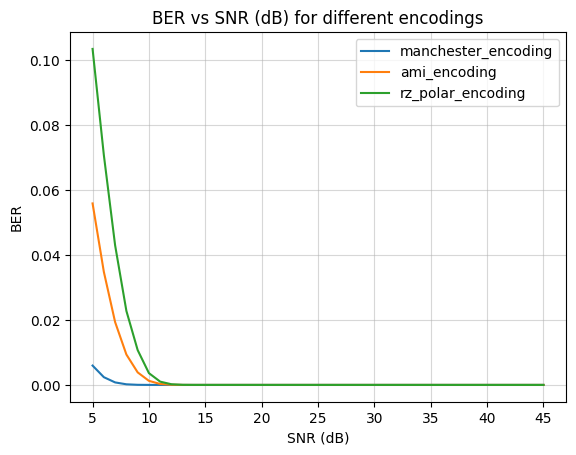

In [51]:
plot_from_result(['manchester_encoding', 'ami_encoding', 'rz_polar_encoding'])

# BER por SNR Zoom (5dB a 15dB)

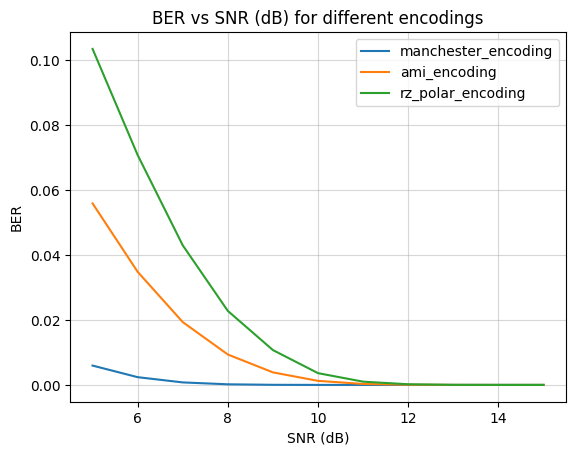

In [52]:
plot_from_result(['manchester_encoding', 'ami_encoding', 'rz_polar_encoding'], max_x=15)

# Relatório: Comparação da BER Medida com a BER Teórica para 2-PAM Unipolar NRZ

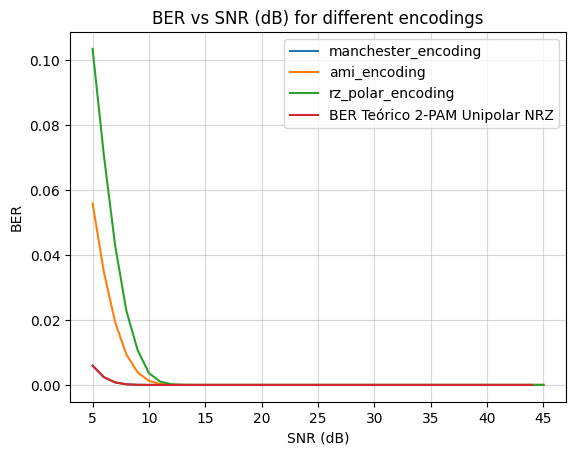

In [62]:
import pandas as pd
import numpy as np
from scipy.special import erfc

# Generate SNR values (in dB)
snr_db = np.arange(5, 45, 1)  # From 5 to 45 dB
snr_linear = 10**(snr_db / 10)

# Compute theoretical BER for 2-PAM Unipolar NRZ
ber_theoretical = 0.5 * erfc(np.sqrt(snr_linear))

# Create and display the DataFrame
df_theoretical = pd.DataFrame({
    'SNR': snr_db,
    'BER': ber_theoretical
})

plot_from_result(
    ['manchester_encoding', 'ami_encoding', 'rz_polar_encoding'],
    [(df_theoretical, 'BER Teórico 2-PAM Unipolar NRZ')]
)

### Introdução

Este relatório tem como objetivo comparar a **taxa de erro de bits (BER)** obtida experimentalmente com a **probabilidade teórica de erro de bit** para um sistema 2-PAM Unipolar NRZ, cuja fórmula é dada por:

$$
P_b = Q\left(\sqrt{\frac{2E_b}{N_0}}\right)
$$

ou, de forma equivalente usando a função complementar do erro:

$$
P_b = \frac{1}{2} \cdot \operatorname{erfc}\left(\sqrt{\text{SNR}_{\text{linear}}}\right)
$$

---

### Análise dos Resultados

Os valores de BER medidos foram obtidos a partir de simulações utilizando os seguintes esquemas de codificação de linha:

* **Manchester**
* **AMI (Alternate Mark Inversion)**
* **RZ Polar (Return-to-Zero Polar)**

---

### Comparação com a Teoria

A curva teórica de BER para o 2-PAM Unipolar NRZ representa o desempenho ideal de um sistema de modulação binária com decisão ótima, em um canal AWGN (ruído branco gaussiano aditivo) ideal. Entretanto, os resultados medidos apresentam divergências em relação a essa curva, conforme mostrado no gráfico.

---

### Análise dos Resultados

Como pode ser obsevado, a curva teórica de BER para o 2-PAM Unipolar NRZ é extremamente próxima a curva simulada para o esquema Manchester, enquanto que a curva simulada para o esquema AMI e RZ Polar são relativamente distantes. Isso se deve ao fato de que para o sistema de simulação que esta sendo utilizado, o esquema Manchester é o mais eficiente e pode gerar detecções mais fáceis e simples tendo em vista que o sinal pode ser detectado com um simples comparador de 1 nível. Ao passo que o esquema AMI e RZ Polar necessitam de um comparador de 2 níveis no mínimo ou uma retificação do sinal. Gerando assim uma maior sensibilidade ao ruído e uma maior BER. Dessa forma era esperado que para os experimentos realizados, o esquema Manchester apresentasse o melhor desempenho, muito próximo a curva teórica.

---

### Conclusão

A curva teórica de BER para 2-PAM Unipolar NRZ serve como um limite inferior ideal de desempenho. As diferenças observadas entre os valores teóricos e os valores medidos devem-se às propriedades físicas e espectrais dos esquemas de codificação utilizados (Manchester, AMI, RZ Polar), além de limitações práticas do sistema real.

Essas diferenças destacam a importância de se escolher o esquema de codificação de linha adequado de acordo com os requisitos de sincronização, consumo de largura de banda, e robustez ao ruído do sistema.
